# Data Analysis

## Importing necessary libraries and packages

In [89]:
!pip install pandas xlrd openpyxl xlsxwriter

   ---------------------------------------- 0.0/165.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/165.1 kB ? eta -:--:--
   -- ------------------------------------- 10.2/165.1 kB ? eta -:--:--
   ------- ------------------------------- 30.7/165.1 kB 262.6 kB/s eta 0:00:01
   -------------- ------------------------ 61.4/165.1 kB 409.6 kB/s eta 0:00:01
   -------------------------------------  163.8/165.1 kB 893.0 kB/s eta 0:00:01
   -------------------------------------  163.8/165.1 kB 893.0 kB/s eta 0:00:01
   -------------------------------------  163.8/165.1 kB 893.0 kB/s eta 0:00:01
   -------------------------------------  163.8/165.1 kB 893.0 kB/s eta 0:00:01
   -------------------------------------- 165.1/165.1 kB 494.8 kB/s eta 0:00:00


In [90]:
!pip install --upgrade openpyxl

In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Converting xls to xlsx if required

In [21]:
def convert_xls_to_xlsx(file_path):
    if os.path.isfile(file_path) and file_path.lower().endswith(".xls"):
        xlsx_file = file_path.replace(".xls", ".xlsx") 

        df = pd.read_excel(file_path, engine="xlrd")

        df.to_excel(xlsx_file, index=False, engine="openpyxl")

        print(f"Converted '{file_path}' to '{xlsx_file}' successfully!")
        return xlsx_file
    else:
        print("The file is in proper format for further processing.")
        return None

file_path = "sample_data.xls" 
convert_xls_to_xlsx(file_path)


Converted 'sample_data.xls' to 'sample_data.xlsx' successfully!


'sample_data.xlsx'

## Loading the excel sheet and finding number of unique users

In [60]:
df = pd.read_excel("sample_data.xlsx")
df.head()

,Learning activity - Title,Learning activity - ID,Learning activity - Duration,Delivery Type,Learning Source Name,Learner - Name,Learner - Email,Learner - ID,Transcript status,Completion Date
0,Introduction to Artificial Intelligence,MDL-211,75.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-16T11:34:07Z
1,"Climate, Biodiversity, and Human Society (brou...",MDL-285,180.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-28T13:03:52Z
2,Beyond Conservation to Sustainability,MDL-288,60.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-28T13:45:44Z
3,Make an Impact with Data Analytics,MDL-289,90.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-28T14:00:09Z
4,Make an Impact with AI,MDL-290,90.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-28T14:24:03Z


In [61]:
unique_users = df["Learner - ID"].nunique()
print(f"Number of Unique Users: {unique_users}")

Number of Unique Users: 4459


## No. of completed and inprogress activities using bar graph and pie charts

#### Bar Graph

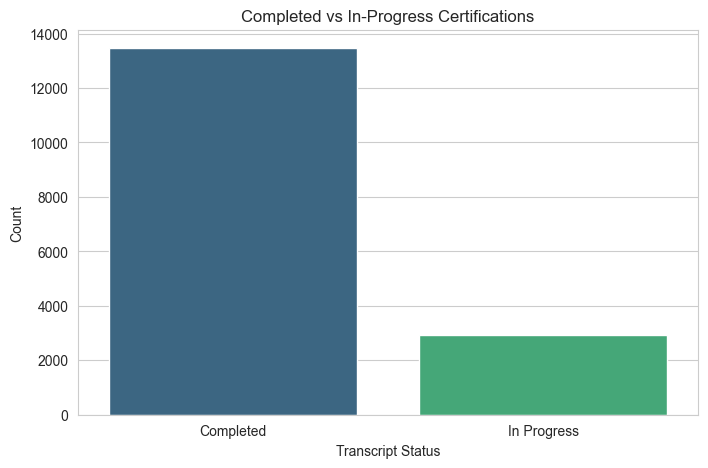

In [64]:
status_counts = df["Transcript status"].value_counts()

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
plt.xlabel("Transcript Status")
plt.ylabel("Count")
plt.title("Completed vs In-Progress Certifications")
plt.show()

#### Pie Chart

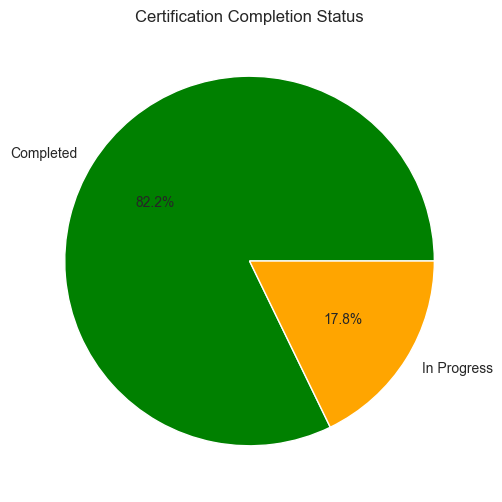

In [66]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", colors=["green", "orange"])
plt.title("Certification Completion Status")
plt.show()

## A table showing count of Completed/ All in progress / All Unique users Based on Quaterly Split

In [68]:
# Convert 'Completion Date' to datetime
df["Completion Date"] = pd.to_datetime(df["Completion Date"], errors="coerce")

# Extract quarters
df["Quarter"] = df["Completion Date"].dt.to_period("Q")


C:\Users\Admin\AppData\Local\Temp\ipykernel_6056\2114227541.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Quarter"] = df["Completion Date"].dt.to_period("Q")


In [71]:
quarterly_summary = df.pivot_table(index="Quarter", columns="Transcript status", values="Learner - ID", aggfunc="nunique", fill_value=0)
quarterly_summary["Unique Users"] = df.groupby("Quarter")["Learner - ID"].nunique()
print(quarterly_summary)
new = pd.DataFrame(quarterly_summary)

Transcript status  Completed  Unique Users
Quarter                                   
2024Q3                   471           471
2024Q4                  2761          2761
2025Q1                    34            34


In [73]:
new

Transcript status,Completed,Unique Users
Quarter,,
2024Q3,471,471
2024Q4,2761,2761
2025Q1,34,34


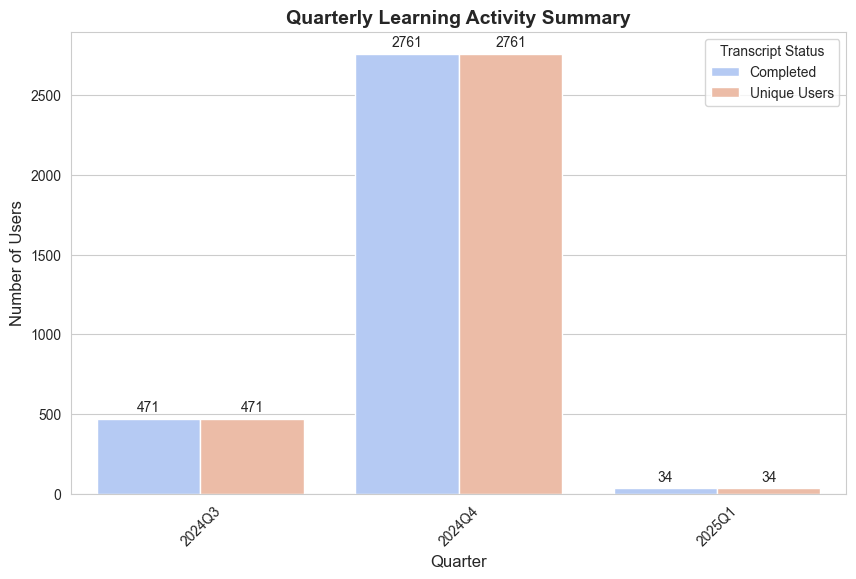

In [75]:
quarterly_summary = df.pivot_table(index="Quarter", columns="Transcript status", values="Learner - ID", aggfunc="nunique", fill_value=0)
quarterly_summary["Unique Users"] = df.groupby("Quarter")["Learner - ID"].nunique()

quarterly_summary = quarterly_summary.reset_index()

quarterly_summary_melted = quarterly_summary.melt(id_vars="Quarter", var_name="Status", value_name="Count")

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="Quarter", y="Count", hue="Status", data=quarterly_summary_melted, palette="coolwarm")

plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Quarterly Learning Activity Summary", fontsize=14, fontweight="bold")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.legend(title="Transcript Status")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

## Progress tracking of top 20 most common learning activities

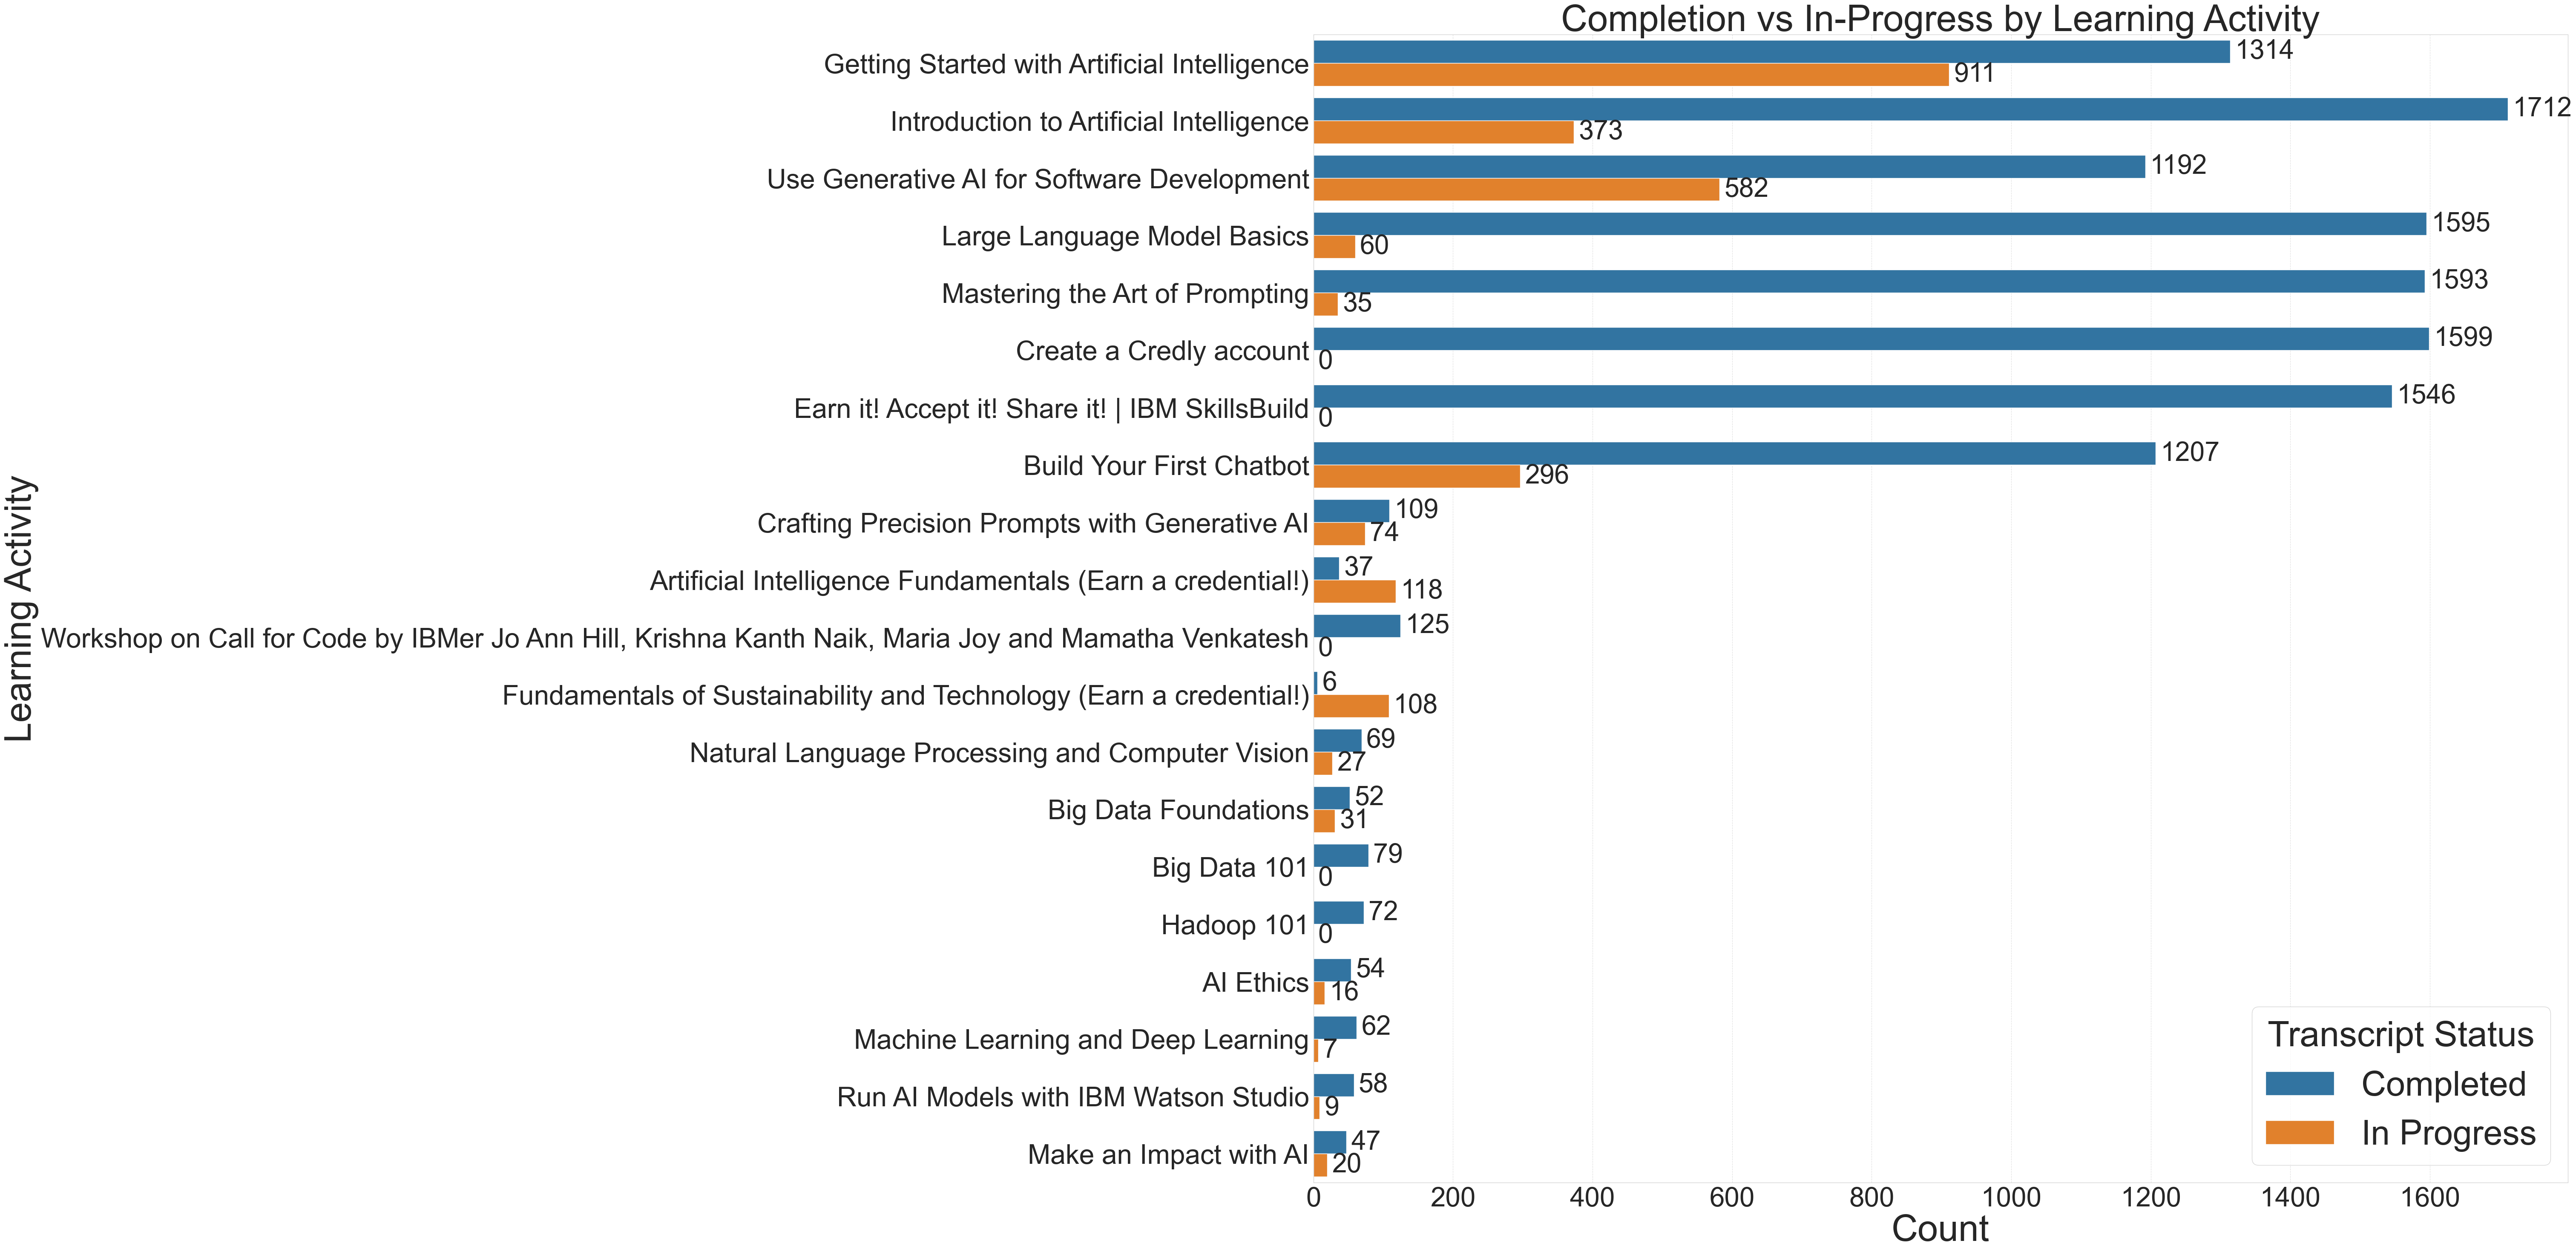

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 20 most frequent learning activities for better readability
top_activities = df["Learning activity - Title"].value_counts().index[:20]

plt.figure(figsize=(38, 35))  # Increased figure size
ax = sns.countplot(
    data=df[df["Learning activity - Title"].isin(top_activities)], 
    y="Learning activity - Title", 
    hue="Transcript status", 
    order=top_activities
)

# Add count labels next to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=8, fontsize=45)

# Increase font sizes for better readability
plt.xlabel("Count", fontsize=62)
plt.ylabel("Learning Activity", fontsize=62)
plt.title("Completion vs In-Progress by Learning Activity", fontsize=62)

# Adjust legend
plt.legend(title="Transcript Status", loc="lower right", fontsize=58, title_fontsize=60)

# Improve grid visibility
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Increase tick label size
plt.xticks(fontsize=46)
plt.yticks(fontsize=46)

plt.show()


## Seperate excel table with Unique users

In [214]:
import pandas as pd

df = pd.read_excel("sample_data.xlsx")

df["Completion Date"] = pd.to_datetime(df["Completion Date"], format='mixed').dt.tz_localize(None)

df["Quarter"] = df["Completion Date"].dt.to_period("Q")

quarterly_summary = df.pivot_table(
    index="Quarter",
    columns="Transcript status",
    values="Learner - ID",
    aggfunc="nunique",
    fill_value=0
)

quarterly_summary["Unique Users"] = df.groupby("Quarter")["Learner - ID"].nunique()

completed_users = df[df["Transcript status"] == "Completed"]
in_progress_users = df[df["Transcript status"] == "In Progress"]

output_filename = "Quarterly_Users_Report.xlsx"

with pd.ExcelWriter(output_filename, engine="xlsxwriter") as writer:
    quarterly_summary.to_excel(writer, sheet_name="Summary")
    completed_users.to_excel(writer, sheet_name="Completed", index=False)
    in_progress_users.to_excel(writer, sheet_name="In Progress", index=False)
    
    workbook = writer.book
    worksheet = writer.sheets["Summary"]

    data_validation = workbook.add_worksheet("Selection")
    data_validation.write_column("A1", ["All Completed", "All In Progress", "All Unique Users"])

    worksheet.data_validation("G2", {
        "validate": "list",
        "source": "='Selection'!$A$1:$A$3",
        "input_message": "Select the user type to view",
        "error_message": "Invalid selection!"
    })

print(f"Excel report generated: {output_filename}")


Excel report generated: Quarterly_Users_Report.xlsx
